In [ ]:
import pandas as pd
df = pd.read_csv('/content/iris (1).csv')


**DATA EXPLORATION**

In [ ]:
print(df.head())
print()
print("Info about The dataset")
print(df.info())
print()
print("Coloumns in the dataset")
print(df.columns)
print()
print("Shape")
print(df.shape)
print()
print("Describe the dataset")
print(df.describe())
print()
print("Data types of each column")
print(df.dtypes)
print()
print("Checking for NULL values")
print(df.isnull().sum())
print()

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Info about The dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Coloumns in the dataset
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='obje

**DATA VISUALIZATION**

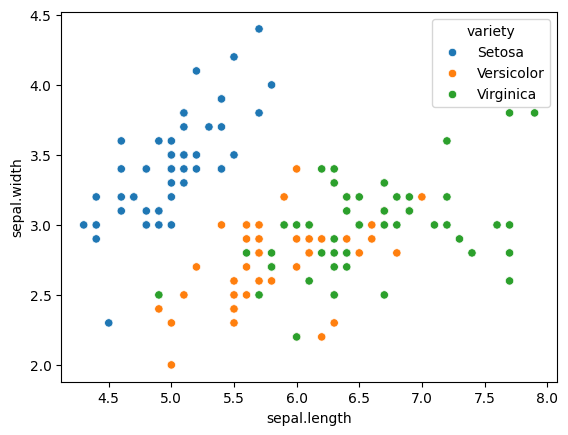

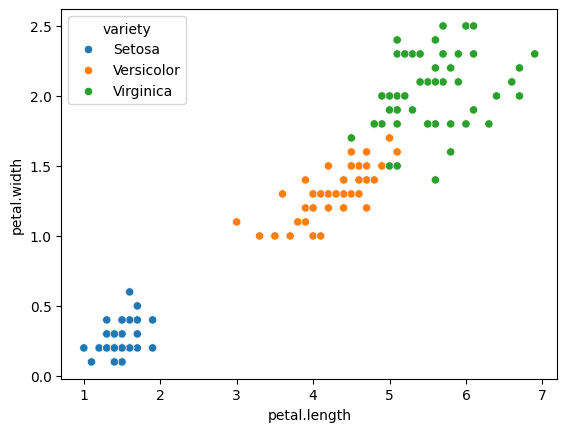

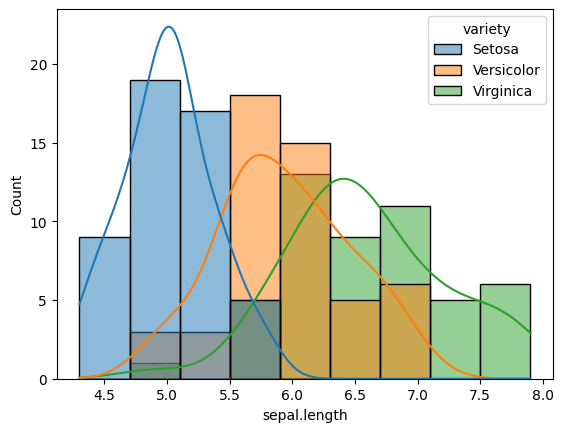

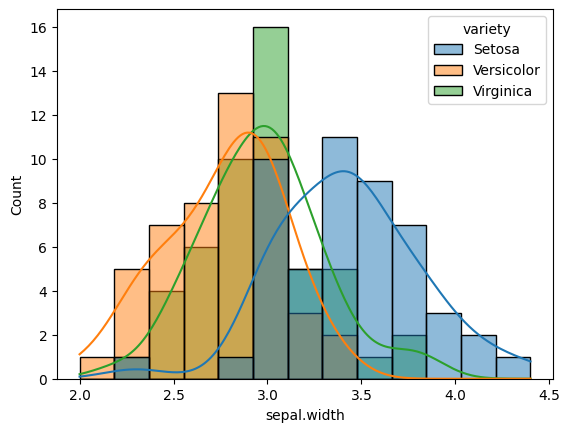

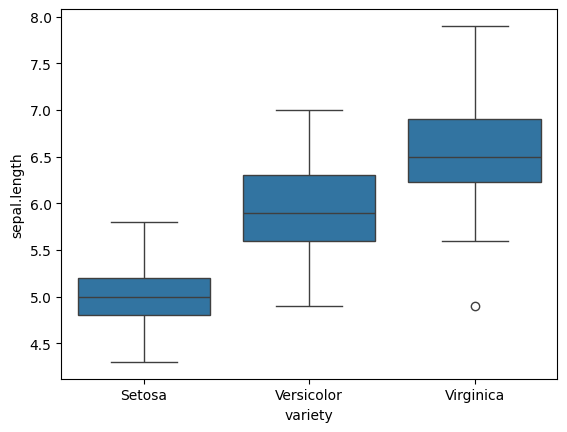

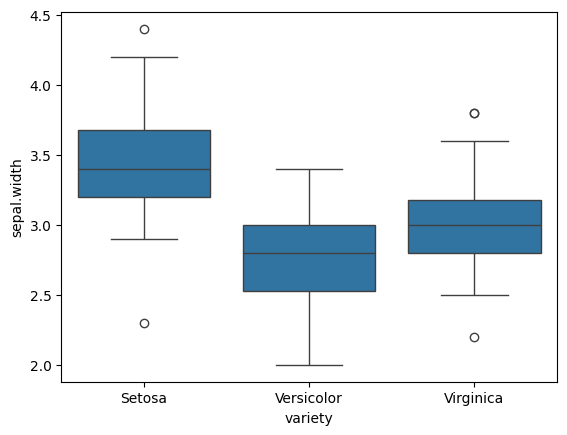

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#SCATTER PLOT
sns.scatterplot(data=df, x='sepal.length', y='sepal.width', hue='variety')
plt.show()

sns.scatterplot(data=df, x='petal.length', y='petal.width', hue='variety')
plt.show()

#HISTOGRAM
sns.histplot(data=df, x='sepal.length', hue='variety', kde=True)
plt.show()

sns.histplot(data=df, x='sepal.width', hue='variety', kde=True)
plt.show()

#BOX PLOT
sns.boxplot(data=df, x='variety', y='sepal.length')
plt.show()

sns.boxplot(data=df, x='variety', y='sepal.width')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read and prepare the data
data = pd.read_csv('/content/iris (1).csv')
X = data.drop('variety', axis=1)
y_true = data['variety']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train K-means model
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
y_pred_nums = kmeans.fit_predict(X_scaled)

# Map cluster numbers to variety names
cluster_to_variety = {}
for cluster in range(n_clusters):
    mask = (y_pred_nums == cluster)
    true_labels = y_true[mask]
    most_common = true_labels.mode()[0]
    cluster_to_variety[cluster] = most_common

#predicting output for the values
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])
new_data_scaled = scaler.transform(new_data)
cluster = kmeans.predict(new_data_scaled)[0]
print(f"Cluster for the new data: {cluster}")
predicted_variety = cluster_to_variety[cluster]
print(f"Predicted Iris Variety: {predicted_variety}")


Cluster for the new data: 1
Predicted Iris Variety: Setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
